In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression()	
rnd_clf = RandomForestClassifier()	
svm_clf = SVC()		

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [2]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
test

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

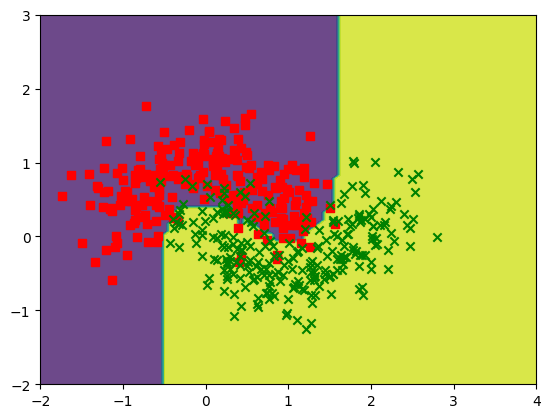

In [5]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-2, 4, 100).reshape(-1, 1),
                      np.linspace(-2, 3, 100).reshape(-1, 1))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# plot the decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.8)

# plot the data points on top of the decision boundary 
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')

In [3]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [4]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

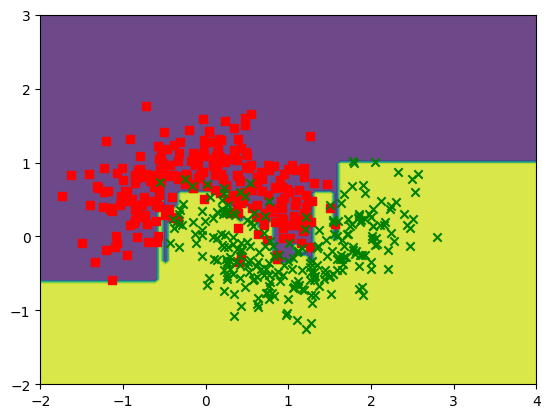

In [5]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-2, 4, 100).reshape(-1, 1),
                      np.linspace(-2, 3, 100).reshape(-1, 1))

Z = ada_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# plot the decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.8)

# plot the data points on top of the decision boundary 
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')

In [37]:
from sklearn.datasets import make_s_curve

from sklearn.ensemble import GradientBoostingRegressor



X,y = make_s_curve(n_samples=100 ,random_state=42)

In [42]:
X = X[:,0:1]

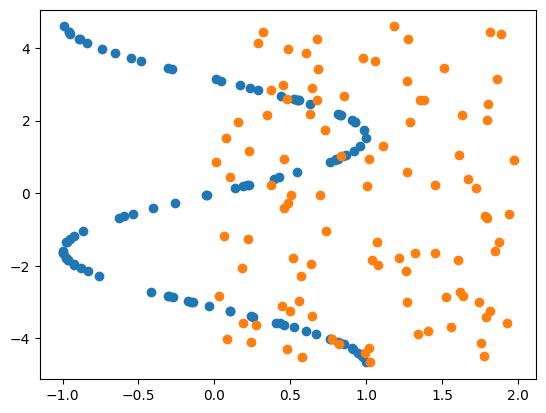

In [39]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

IndexError: index 1 is out of bounds for axis 1 with size 1

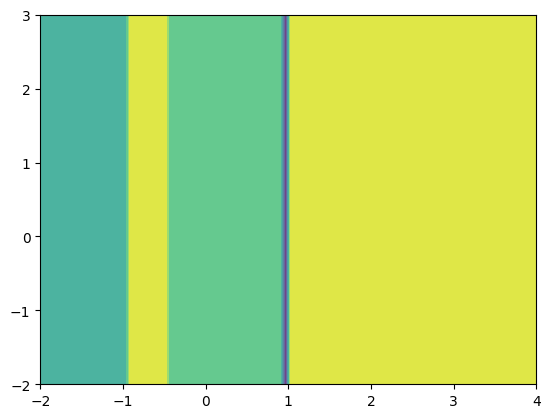

In [45]:
xx, yy = np.meshgrid(np.linspace(-2, 4, 100).reshape(-1, 1),
                      np.linspace(-2, 3, 100).reshape(-1, 1))

Z = gbrt.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)


# plot the decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.8)

# plot the data points on top of the decision boundary 
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')

In [9]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200)
gbrt.fit(X_train, y_train)

errors = [mean_absolute_error(y_valid, y_pred)
					for y_pred in gbrt.staged_predict(X_valid)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)



GradientBoostingRegressor(max_depth=2, n_estimators=164)

In [10]:

bst_n_estimators

164

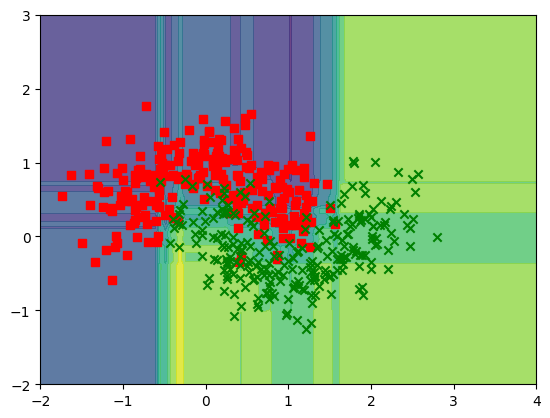

In [14]:
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-2, 4, 100).reshape(-1, 1),
                      np.linspace(-2, 3, 100).reshape(-1, 1))

Z = gbrt_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# plot the decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.8)

# plot the data points on top of the decision boundary 
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_valid)
    val_error = mean_absolute_error(y_valid, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [15]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_valid)


In [ ]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=2)